# EPIDEMIC FORECASTING ANALYSIS - NON-ZERO I_CHILD ONLY

1week:
  Total samples: 418
  Non-zero samples: 418 (100.0%)
  Zero samples removed: 0

2week:
  Total samples: 417
  Non-zero samples: 417 (100.0%)
  Zero samples removed: 0

4week:
  Total samples: 415
  Non-zero samples: 415 (100.0%)
  Zero samples removed: 0

8week:
  Total samples: 411
  Non-zero samples: 411 (100.0%)
  Zero samples removed: 0


PERFORMANCE ON NON-ZERO I_CHILD CASES ONLY
(Evaluating model during active epidemic periods)
Forecast Horizon  Samples (Non-Zero) MAE (cases) RMSE (cases) MAPE (%) Mean True Value MAE / Mean
    1-week ahead                 418      112416       186700   2039.4           47698      2.36x
    2-week ahead                 417       85170       138589   1477.9           47187      1.80x
    4-week ahead                 415      159472       324825   4009.8           46153      3.46x
    8-week ahead                 411      124484       223564   2068.9           45686      2.72x


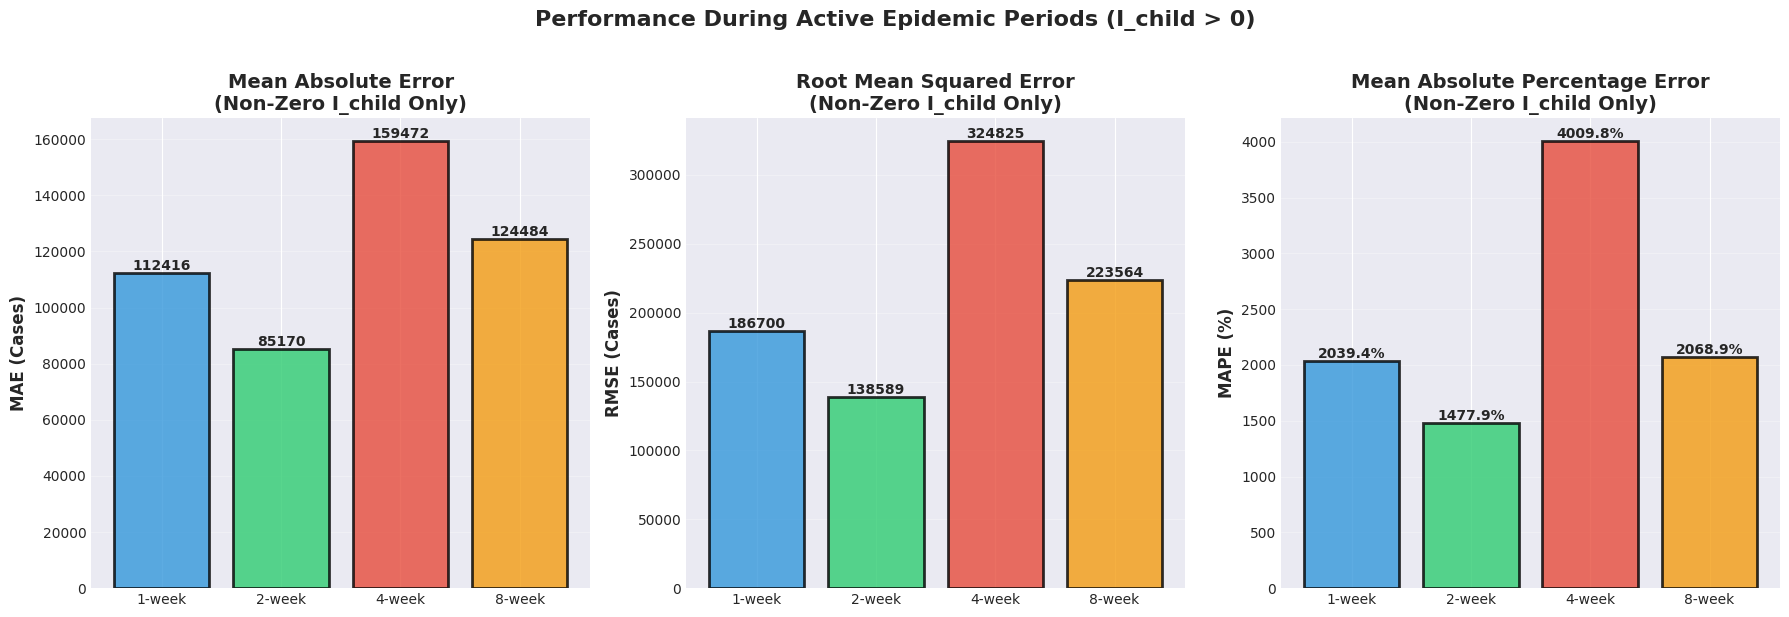

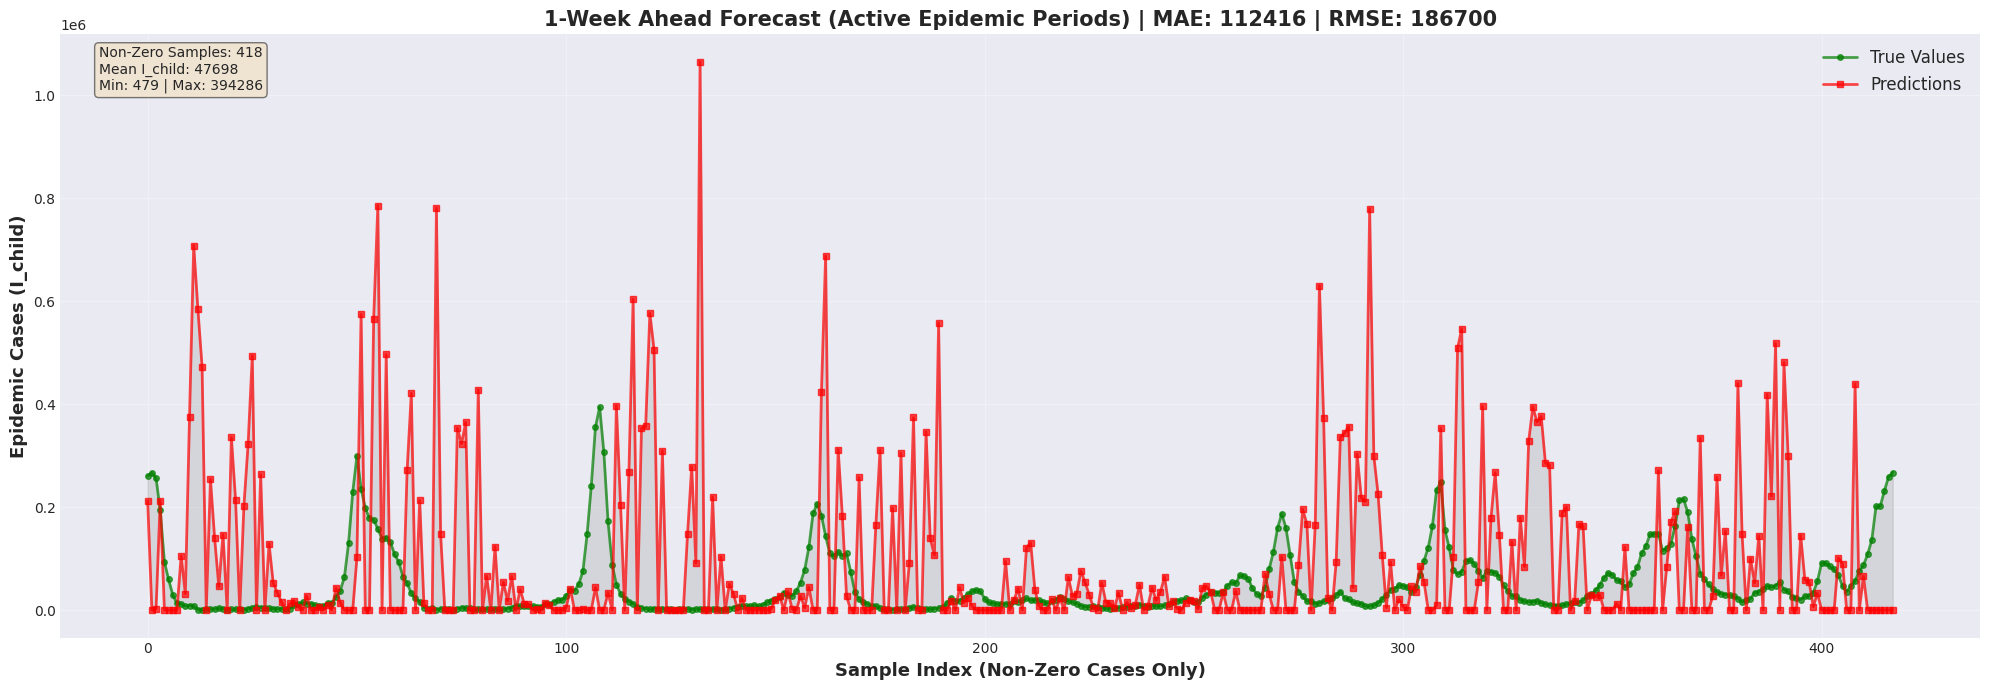

1week: 1-week ahead (non-zero cases)
  MAE: 112416 cases | RMSE: 186700 cases
  Mean true value: 47698 cases
  Range: 479 - 394286 cases



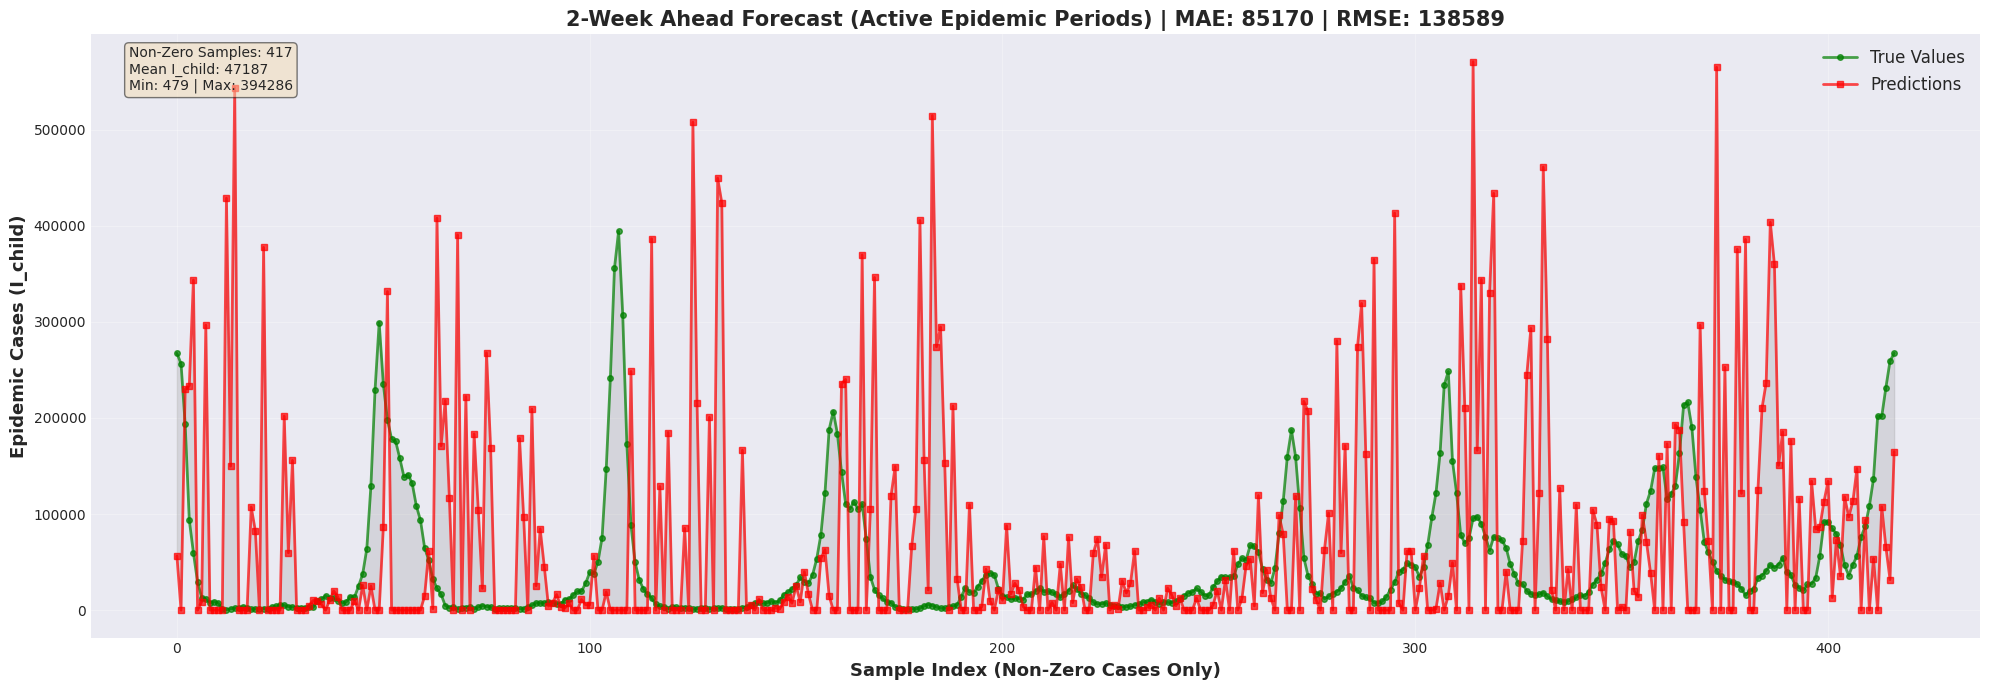

2week: 2-week ahead (non-zero cases)
  MAE: 85170 cases | RMSE: 138589 cases
  Mean true value: 47187 cases
  Range: 479 - 394286 cases



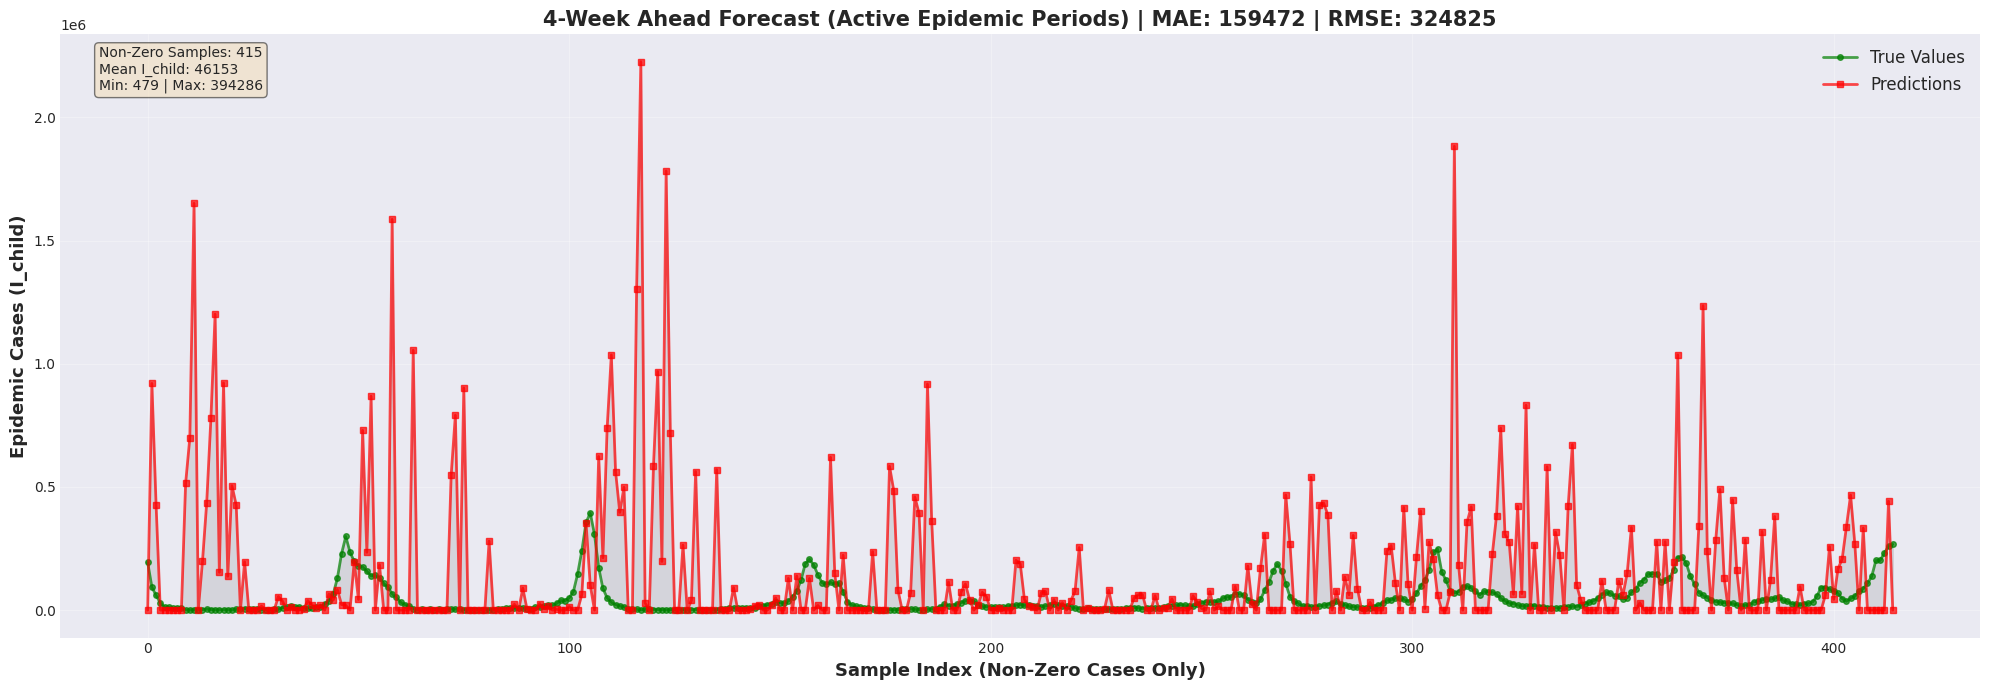

4week: 4-week ahead (non-zero cases)
  MAE: 159472 cases | RMSE: 324825 cases
  Mean true value: 46153 cases
  Range: 479 - 394286 cases



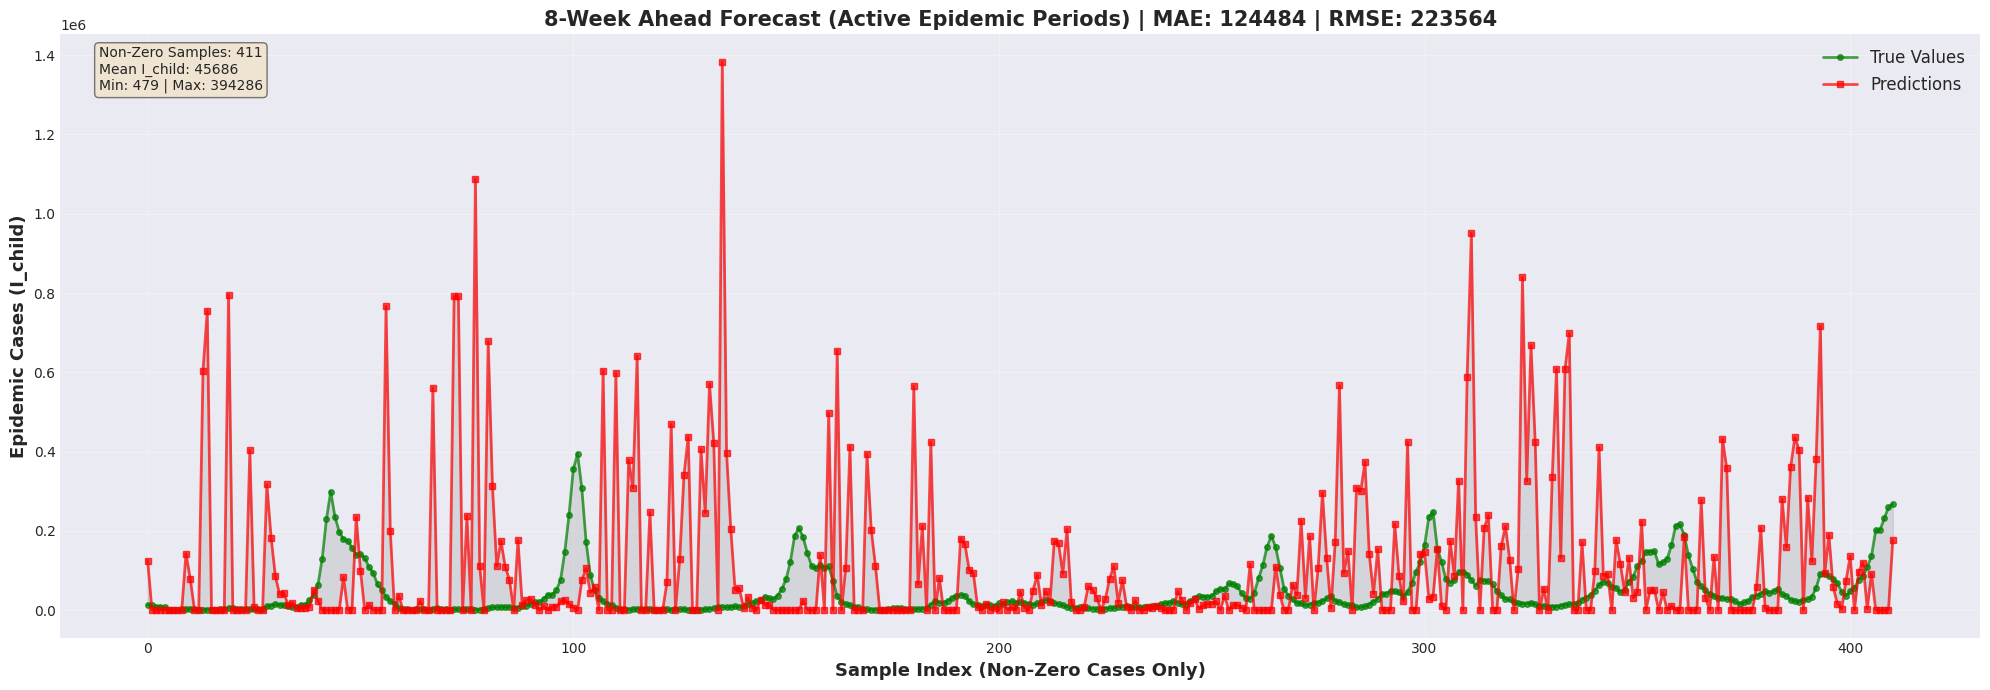

8week: 8-week ahead (non-zero cases)
  MAE: 124484 cases | RMSE: 223564 cases
  Mean true value: 45686 cases
  Range: 479 - 394286 cases



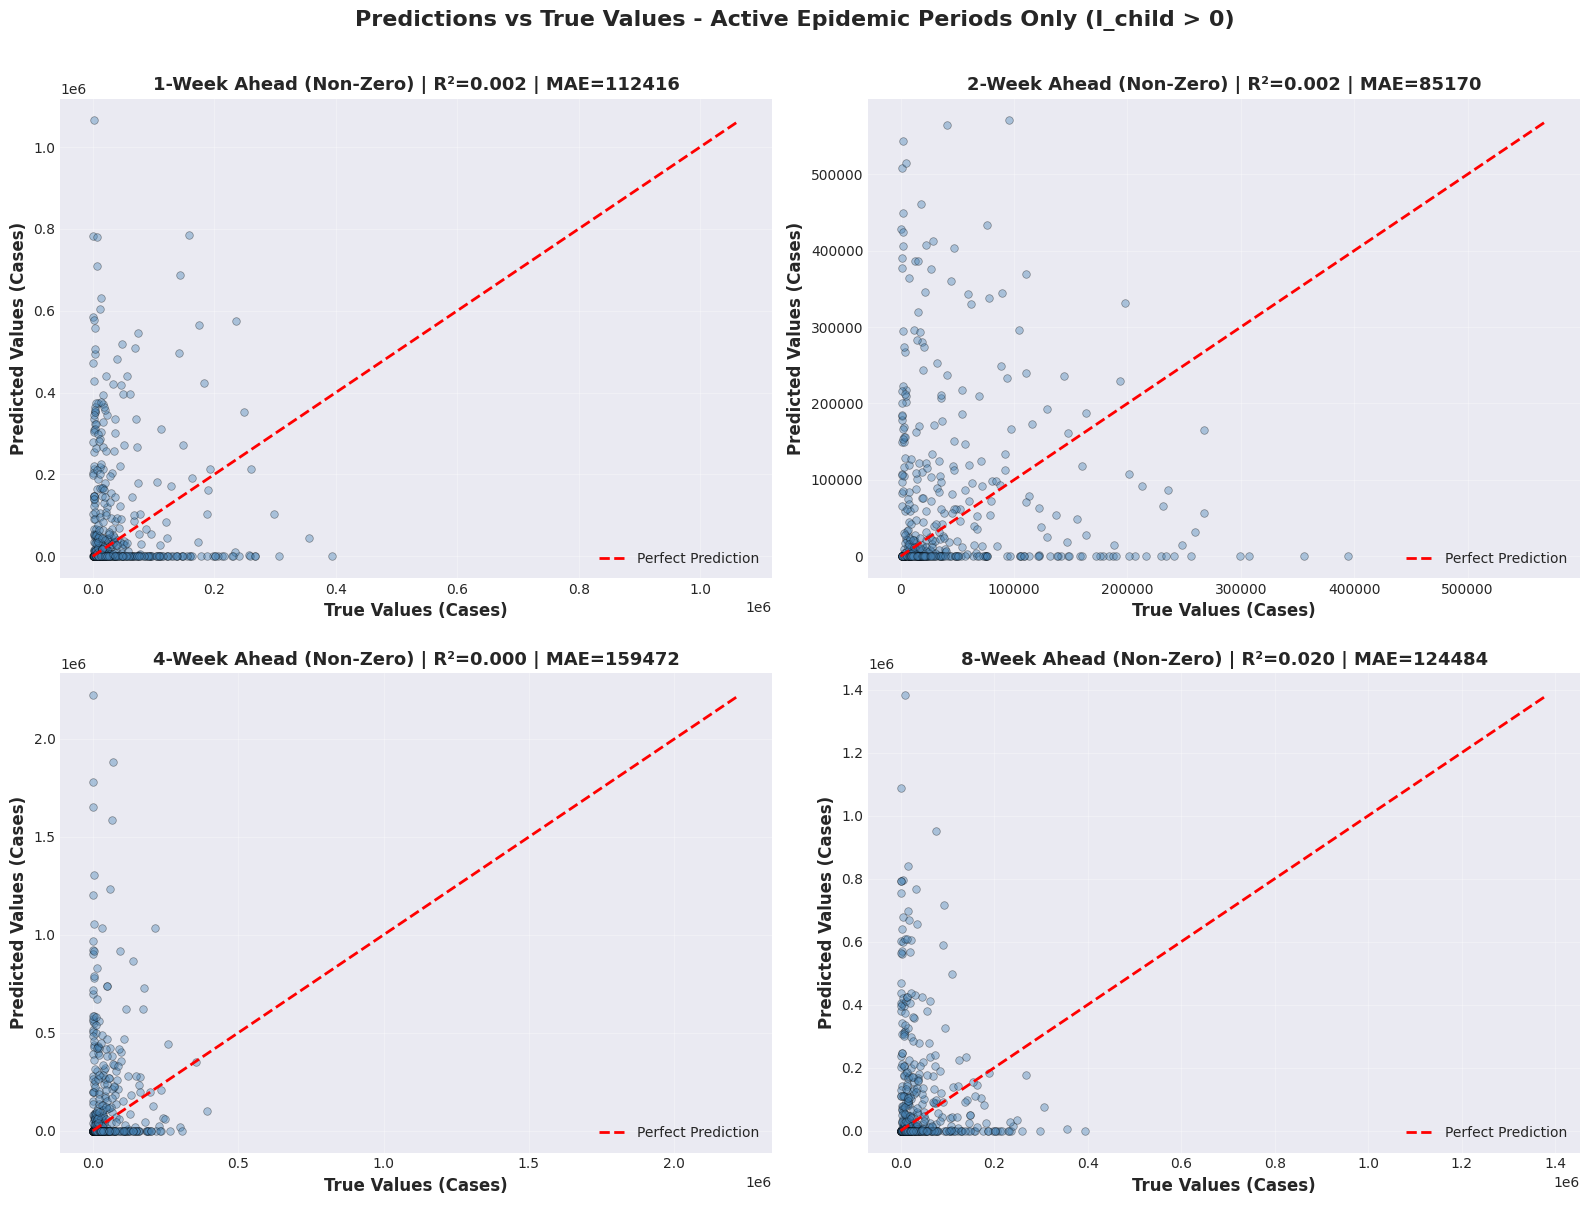

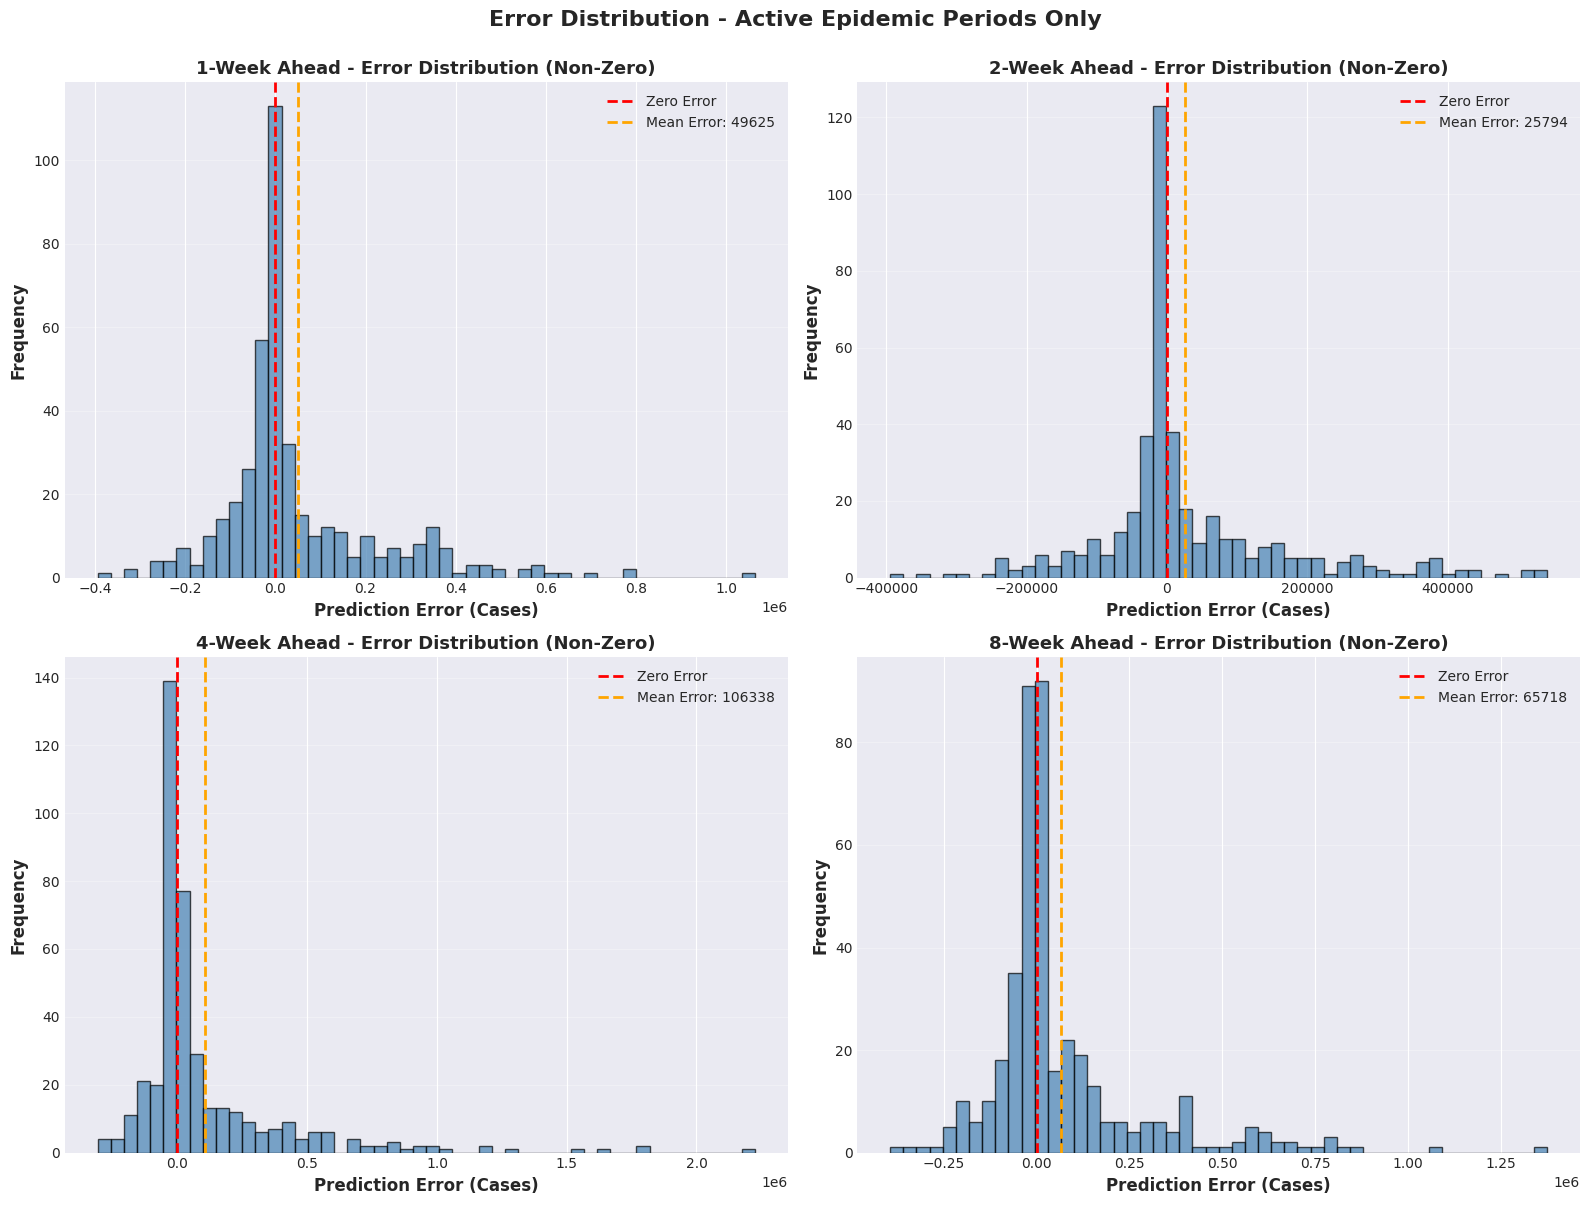


COMPARISON: ALL CASES vs NON-ZERO CASES ONLY
Horizon All Cases MAE Non-Zero MAE Difference % Change Non-Zero %
 1-week        112416       112416         +0    +0.0%     100.0%
 2-week         85170        85170         +0    +0.0%     100.0%
 4-week        159472       159472         +0    +0.0%     100.0%
 8-week        124484       124484         +0    +0.0%     100.0%

Interpretation:
  Positive difference = Model performs WORSE during active epidemics
  Negative difference = Model performs BETTER during active epidemics


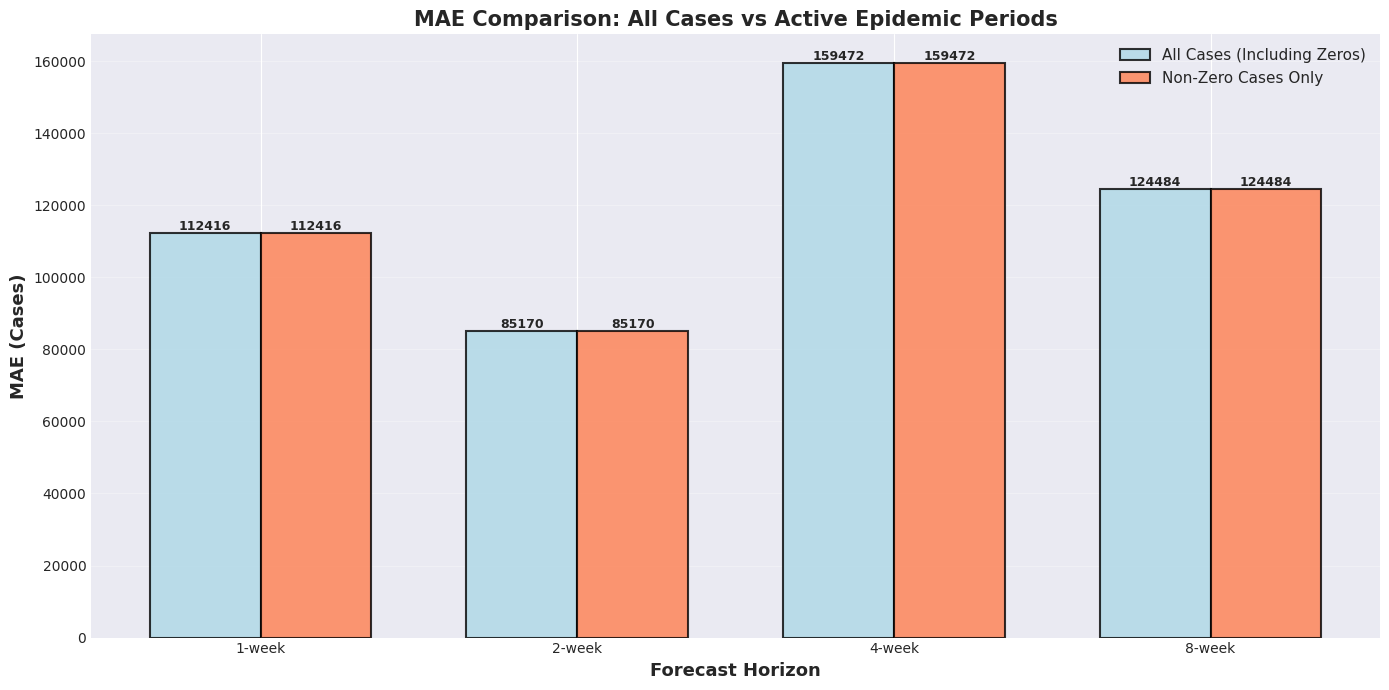


DETAILED SUMMARY STATISTICS - NON-ZERO I_CHILD CASES ONLY
Horizon  N (Non-Zero)    MAE   RMSE Mean Error Std Error Min True Max True Mean True
 1-week           418 112416 186700      49625    179984      479   394286     47698
 2-week           417  85170 138589      25794    136167      479   394286     47187
 4-week           415 159472 324825     106338    306926      479   394286     46153
 8-week           411 124484 223564      65718    213687      479   394286     45686

✅ Non-zero analysis complete! All plots saved.

Generated files:
  - nonzero_metrics_comparison.png
  - timeseries_nonzero_*.png (4 files)
  - scatter_nonzero.png
  - error_distribution_nonzero.png
  - comparison_all_vs_nonzero.png


In [1]:
# ============================================================================
# EPIDEMIC FORECASTING ANALYSIS - NON-ZERO I_CHILD ONLY
# Evaluate model performance during active epidemic periods only
# ============================================================================

# CELL 1: Imports and Setup
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# CELL 2: Load Results and Filter Non-Zero I_child
# ============================================================================

horizons = ['1week', '2week', '4week', '8week']
results_dir = Path('./results')

# Load and extract FINAL week predictions, then filter non-zero
filtered_results = {}

for horizon in horizons:
    result_path = results_dir / f'sentinelle_ILI_{horizon}'
    
    # Load predictions
    preds_full = np.load(result_path / 'preds_original.npy')
    trues_full = np.load(result_path / 'trues_original.npy')
    
    # Handle 1D arrays
    if preds_full.ndim == 1:
        preds_full = preds_full.reshape(-1, 1)
        trues_full = trues_full.reshape(-1, 1)
    
    # Extract ONLY the final week (last column)
    final_week_idx = preds_full.shape[1] - 1
    preds = preds_full[:, final_week_idx]
    trues = trues_full[:, final_week_idx]
    
    # Filter: Keep only samples where true I_child > 0
    non_zero_mask = trues > 0
    preds_filtered = preds[non_zero_mask]
    trues_filtered = trues[non_zero_mask]
    
    filtered_results[horizon] = {
        'preds': preds_filtered,
        'trues': trues_filtered,
        'horizon_weeks': preds_full.shape[1],
        'total_samples': len(preds),
        'non_zero_samples': len(preds_filtered),
        'zero_samples': len(preds) - len(preds_filtered),
        'percent_non_zero': 100 * len(preds_filtered) / len(preds)
    }
    
    print(f"{horizon}:")
    print(f"  Total samples: {filtered_results[horizon]['total_samples']}")
    print(f"  Non-zero samples: {filtered_results[horizon]['non_zero_samples']} ({filtered_results[horizon]['percent_non_zero']:.1f}%)")
    print(f"  Zero samples removed: {filtered_results[horizon]['zero_samples']}")
    print()

# ============================================================================
# CELL 3: Compute Metrics for Non-Zero Cases Only
# ============================================================================

def compute_metrics(preds, trues):
    """Compute MAE, MSE, RMSE, MAPE"""
    mae = np.mean(np.abs(preds - trues))
    mse = np.mean((preds - trues)**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((preds - trues) / np.maximum(trues, 1))) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

# Compute metrics on non-zero cases
metrics_data = []

for horizon in horizons:
    preds = filtered_results[horizon]['preds']
    trues = filtered_results[horizon]['trues']
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    metrics = compute_metrics(preds, trues)
    
    metrics_data.append({
        'Forecast Horizon': f'{weeks_ahead}-week ahead',
        'Samples (Non-Zero)': filtered_results[horizon]['non_zero_samples'],
        'MAE (cases)': f"{metrics['MAE']:.0f}",
        'RMSE (cases)': f"{metrics['RMSE']:.0f}",
        'MAPE (%)': f"{metrics['MAPE']:.1f}",
        'Mean True Value': f"{trues.mean():.0f}",
        'MAE / Mean': f"{metrics['MAE'] / trues.mean():.2f}x"
    })

df_metrics = pd.DataFrame(metrics_data)

print("\n" + "="*120)
print("PERFORMANCE ON NON-ZERO I_CHILD CASES ONLY")
print("(Evaluating model during active epidemic periods)")
print("="*120)
print(df_metrics.to_string(index=False))
print("="*120)

# ============================================================================
# CELL 4: Comparison Bar Chart - Non-Zero Cases
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

horizon_labels = ['1-week', '2-week', '4-week', '8-week']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

# Extract numeric values
maes = [float(m['MAE (cases)'].replace(',', '')) for m in metrics_data]
rmses = [float(m['RMSE (cases)'].replace(',', '')) for m in metrics_data]
mapes = [float(m['MAPE (%)']) for m in metrics_data]

# MAE Plot
axes[0].bar(horizon_labels, maes, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_ylabel('MAE (Cases)', fontsize=12, fontweight='bold')
axes[0].set_title('Mean Absolute Error\n(Non-Zero I_child Only)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, mae in enumerate(maes):
    axes[0].text(i, mae, f'{mae:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# RMSE Plot
axes[1].bar(horizon_labels, rmses, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_ylabel('RMSE (Cases)', fontsize=12, fontweight='bold')
axes[1].set_title('Root Mean Squared Error\n(Non-Zero I_child Only)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, rmse in enumerate(rmses):
    axes[1].text(i, rmse, f'{rmse:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# MAPE Plot
axes[2].bar(horizon_labels, mapes, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[2].set_ylabel('MAPE (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Mean Absolute Percentage Error\n(Non-Zero I_child Only)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, mape in enumerate(mapes):
    axes[2].text(i, mape, f'{mape:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Performance During Active Epidemic Periods (I_child > 0)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('nonzero_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 5: Time Series Plot - Non-Zero Cases Only
# ============================================================================

def plot_nonzero_timeseries(horizon):
    """Plot non-zero predictions vs true values with dates"""
    
    preds = filtered_results[horizon]['preds']
    trues = filtered_results[horizon]['trues']
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    # Compute metrics
    mae = np.mean(np.abs(preds - trues))
    rmse = np.sqrt(np.mean((preds - trues)**2))
    
    # Plot
    fig, ax = plt.subplots(figsize=(20, 7))
    
    # Use index as x-axis since we've filtered
    indices = np.arange(len(preds))
    
    ax.plot(indices, trues, 'o-', color='green', linewidth=2, 
            markersize=4, label='True Values', alpha=0.7)
    ax.plot(indices, preds, 's-', color='red', linewidth=2, 
            markersize=4, label='Predictions', alpha=0.7)
    ax.fill_between(indices, preds, trues, alpha=0.2, color='gray')
    
    ax.set_xlabel('Sample Index (Non-Zero Cases Only)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Epidemic Cases (I_child)', fontsize=13, fontweight='bold')
    ax.set_title(f'{weeks_ahead}-Week Ahead Forecast (Active Epidemic Periods) | MAE: {mae:.0f} | RMSE: {rmse:.0f}', 
                 fontsize=15, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(alpha=0.3)
    
    # Add info box
    info_text = f'Non-Zero Samples: {len(preds)}\nMean I_child: {trues.mean():.0f}\nMin: {trues.min():.0f} | Max: {trues.max():.0f}'
    ax.text(0.02, 0.98, info_text, 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig(f'timeseries_nonzero_{horizon}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"{horizon}: {weeks_ahead}-week ahead (non-zero cases)")
    print(f"  MAE: {mae:.0f} cases | RMSE: {rmse:.0f} cases")
    print(f"  Mean true value: {trues.mean():.0f} cases")
    print(f"  Range: {trues.min():.0f} - {trues.max():.0f} cases\n")

# Plot all horizons
for horizon in horizons:
    plot_nonzero_timeseries(horizon)

# ============================================================================
# CELL 6: Scatter Plot - Non-Zero Cases
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, horizon in enumerate(horizons):
    preds = filtered_results[horizon]['preds']
    trues = filtered_results[horizon]['trues']
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    ax = axes[idx]
    
    # Scatter
    ax.scatter(trues, preds, alpha=0.4, s=30, color='steelblue', edgecolor='black', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(trues.min(), preds.min())
    max_val = max(trues.max(), preds.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    # R²
    correlation = np.corrcoef(trues, preds)[0, 1]
    r2 = correlation ** 2
    
    # MAE
    mae = np.mean(np.abs(preds - trues))
    
    ax.set_xlabel('True Values (Cases)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Predicted Values (Cases)', fontsize=12, fontweight='bold')
    ax.set_title(f'{weeks_ahead}-Week Ahead (Non-Zero) | R²={r2:.3f} | MAE={mae:.0f}', 
                 fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.suptitle('Predictions vs True Values - Active Epidemic Periods Only (I_child > 0)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('scatter_nonzero.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 7: Error Distribution - Non-Zero Cases
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, horizon in enumerate(horizons):
    preds = filtered_results[horizon]['preds']
    trues = filtered_results[horizon]['trues']
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    errors = preds - trues
    
    ax = axes[idx]
    ax.hist(errors, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax.axvline(errors.mean(), color='orange', linestyle='--', linewidth=2, 
               label=f'Mean Error: {errors.mean():.0f}')
    
    ax.set_xlabel('Prediction Error (Cases)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'{weeks_ahead}-Week Ahead - Error Distribution (Non-Zero)', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Error Distribution - Active Epidemic Periods Only', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('error_distribution_nonzero.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 8: Comparative Analysis - All vs Non-Zero
# ============================================================================

# Load ALL data results for comparison (from previous notebook)
all_data_results = {}

for horizon in horizons:
    result_path = results_dir / f'sentinelle_ILI_{horizon}'
    
    preds_full = np.load(result_path / 'preds_original.npy')
    trues_full = np.load(result_path / 'trues_original.npy')
    
    if preds_full.ndim == 1:
        preds_full = preds_full.reshape(-1, 1)
        trues_full = trues_full.reshape(-1, 1)
    
    final_week_idx = preds_full.shape[1] - 1
    preds_all = preds_full[:, final_week_idx]
    trues_all = trues_full[:, final_week_idx]
    
    all_data_results[horizon] = {
        'preds': preds_all,
        'trues': trues_all,
    }

# Compare ALL vs NON-ZERO
comparison = []

for horizon in horizons:
    # All data metrics
    preds_all = all_data_results[horizon]['preds']
    trues_all = all_data_results[horizon]['trues']
    mae_all = np.mean(np.abs(preds_all - trues_all))
    
    # Non-zero metrics
    preds_nonzero = filtered_results[horizon]['preds']
    trues_nonzero = filtered_results[horizon]['trues']
    mae_nonzero = np.mean(np.abs(preds_nonzero - trues_nonzero))
    
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    comparison.append({
        'Horizon': f'{weeks_ahead}-week',
        'All Cases MAE': f'{mae_all:.0f}',
        'Non-Zero MAE': f'{mae_nonzero:.0f}',
        'Difference': f'{mae_nonzero - mae_all:+.0f}',
        '% Change': f'{100*(mae_nonzero - mae_all)/mae_all:+.1f}%',
        'Non-Zero %': f"{filtered_results[horizon]['percent_non_zero']:.1f}%"
    })

df_comparison = pd.DataFrame(comparison)

print("\n" + "="*100)
print("COMPARISON: ALL CASES vs NON-ZERO CASES ONLY")
print("="*100)
print(df_comparison.to_string(index=False))
print("="*100)
print("\nInterpretation:")
print("  Positive difference = Model performs WORSE during active epidemics")
print("  Negative difference = Model performs BETTER during active epidemics")

# ============================================================================
# CELL 9: Side-by-Side Bar Chart Comparison
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(horizons))
width = 0.35

horizon_labels = ['1-week', '2-week', '4-week', '8-week']

# Extract MAE values
mae_all_values = [float(c['All Cases MAE'].replace(',', '')) for c in comparison]
mae_nonzero_values = [float(c['Non-Zero MAE'].replace(',', '')) for c in comparison]

bars1 = ax.bar(x - width/2, mae_all_values, width, label='All Cases (Including Zeros)', 
               color='lightblue', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, mae_nonzero_values, width, label='Non-Zero Cases Only', 
               color='coral', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('MAE (Cases)', fontsize=13, fontweight='bold')
ax.set_xlabel('Forecast Horizon', fontsize=13, fontweight='bold')
ax.set_title('MAE Comparison: All Cases vs Active Epidemic Periods', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(horizon_labels)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('comparison_all_vs_nonzero.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# CELL 10: Summary Statistics - Non-Zero Cases
# ============================================================================

summary_stats = []

for horizon in horizons:
    preds = filtered_results[horizon]['preds']
    trues = filtered_results[horizon]['trues']
    weeks_ahead = filtered_results[horizon]['horizon_weeks']
    
    errors = preds - trues
    
    summary_stats.append({
        'Horizon': f'{weeks_ahead}-week',
        'N (Non-Zero)': filtered_results[horizon]['non_zero_samples'],
        'MAE': f"{np.mean(np.abs(errors)):.0f}",
        'RMSE': f"{np.sqrt(np.mean(errors**2)):.0f}",
        'Mean Error': f"{errors.mean():.0f}",
        'Std Error': f"{errors.std():.0f}",
        'Min True': f"{trues.min():.0f}",
        'Max True': f"{trues.max():.0f}",
        'Mean True': f"{trues.mean():.0f}"
    })

df_summary = pd.DataFrame(summary_stats)

print("\n" + "="*120)
print("DETAILED SUMMARY STATISTICS - NON-ZERO I_CHILD CASES ONLY")
print("="*120)
print(df_summary.to_string(index=False))
print("="*120)

print("\n✅ Non-zero analysis complete! All plots saved.")
print("\nGenerated files:")
print("  - nonzero_metrics_comparison.png")
print("  - timeseries_nonzero_*.png (4 files)")
print("  - scatter_nonzero.png")
print("  - error_distribution_nonzero.png")
print("  - comparison_all_vs_nonzero.png")
